# Pymaceuticals Inc.
---

### Analysis

#### Summary Statistics 
The summary statistics for tumor volume across different drug regimens reveal notable variations. The drug regimen "Capomulin" demonstrates the lowest mean tumor volume of 40.68 mm3, while "Ramicane" closely follows with a mean tumor volume of 40.22 mm3. In contrast, "Ketapril" and "Naftisol" exhibit higher mean tumor volumes of 55.24 mm3 and 54.33 mm3, respectively. The median tumor volume for "Capomulin" is 41.56 mm3, indicating a relatively tight distribution around the mean. However, "Ketapril" and "Naftisol" have median tumor volumes of 53.70 mm3 and 52.51 mm3, suggesting a more dispersed distribution of tumor sizes. Moreover, "Ketapril" shows the highest tumor volume variance of 68.55 mm3, reflecting significant variability in tumor size within this group. Conversely, "Ramicane" exhibits the lowest tumor volume variance of 23.49 mm3, indicating more consistent tumor sizes. In conclusion, the summary statistics highlight distinct differences in tumor volume across various drug regimens, with "Capomulin" and "Ramicane" demonstrating lower tumor volumes, potentially indicating their efficacy in treating tumors. 

#### Distribution of Mouse ID/Timepoints per drug regimen
The total number of rows (Mouse ID/Timepoints) for each drug regimen provides insight into the sample size for each treatment. "Capomulin" and "Ramicane" have the highest number of rows, with 230 and 228 observations, respectively. This larger sample size for these two drug regimens may contribute to the accuracy and reliability of the findings. On the other hand, "Propriva" has the smallest sample size of 148, indicating a smaller representation of mice for this treatment. This limited sample size may lead to less statistically significant results and may require further investigation and data collection. Overall, the variation in the number of rows across drug regimens may impact the validity of the conclusions drawn from the analysis and should be considered in the interpretation of the results.


 #### Distribution of female versus male mice
The distribution of female and male mice in the study shows a relatively balanced representation of both genders. There are a total of 922 female mice and 958 male mice, with a difference of only 36 mice between the two groups. This gender balance in the sample can help ensure that the study's findings are not biased towards one gender over the other. The equal representation of female and male mice provides a more accurate and reliable basis for drawing conclusions about the impact of different treatments and variables on tumor volume and other outcomes. The distribution of mice by gender contributes to the robustness and generalizability of the study's results, as it allows for a more comprehensive understanding of how treatments may affect both female and male subjects.

#### Final Tumor Volume of Each Mouse Across Four Drug Regimens
For Capomulin, there are 25 mice with final tumor volumes ranging from 23.34 mm3 to 46.54 mm3. No potential outliers are identified for this regimen.

For Ramicane, there are 25 mice with final tumor volumes ranging from 22.05 mm3 to 47.78 mm3. No potential outliers are identified for this regimen.

For Infubinol, there are 25 mice with final tumor volumes ranging from 36.32 mm3 to 72.23 mm3. One potential outlier is identified at Timepoint 31 with a tumor volume of 36.32 mm3.

For Ceftamin, there are 25 mice with final tumor volumes ranging from 45.00 mm3 to 68.92 mm3. No potential outliers are identified for this regimen.

These tumor volume values provide insights into the effectiveness of the different treatment regimens in reducing tumor growth. The presence of a potential outlier in the Infubinol regimen suggests that further analysis is needed to determine its impact on the overall results and to assess its significance in the context of the study. Understanding the tumor volume variations across these regimens can help researchers evaluate their potential as cancer treatments and guide future studies for improved therapeutic approaches.

#### Single Mouse Treated with Capomulin
For the mouse "l509" treated with Capomulin, the tumor volume (in mm3) is recorded at various timepoints. The data indicates that the tumor volume decreases over time with the Capomulin treatment, which is a positive outcome. At Timepoint 0, the initial tumor volume is 45.00 mm3. Over the course of the treatment, the tumor volume reduces to 41.48 mm3 at Timepoint 45. The reduction in tumor volume suggests that Capomulin has a positive effect on tumor regression for this specific mouse. Additionally, the mouse also experienced an increase in metastatic sites over time, from 0 at Timepoint 0 to 3 at Timepoint 45, which could indicate further investigation into the metastatic response to the treatment. As a male mouse with an age of 17 months and a weight of 21g, the mouse's demographic information may also be important for understanding the response to the treatment. The observed response in tumor volume and metastatic sites could serve as a valuable data point for assessing the overall effectiveness of Capomulin treatment in the broader context of the study.

#### Correlation and Regression Between Weight and Average Tumor Volume 
The scatter plot of mouse weight versus the average observed tumor volume for the entire Capomulin treatment regimen shows a positive correlation between these variables. The regression line equation, y = 0.95x + 21.55, indicates that as mouse weight (x) increases, the average tumor volume (y) tends to increase as well. The positive slope of 0.95 suggests that for every one-gram increase in mouse weight, the average tumor volume increases by approximately 0.95 mm3. The correlation coefficient of 0.84 further supports the strong positive correlation between mouse weight and average tumor volume. The value of 0.84 indicates a relatively strong relationship, indicating that higher mouse weight is generally associated with higher average tumor volumes in mice treated with Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Display the number of unique mice IDs in the data
len(mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_id = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicates_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"]
mouse_study_cleaned_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regiment_group = mouse_study_cleaned_df.groupby(["Drug Regimen"])

# Calculate mean
regiment_mean = regiment_group["Tumor Volume (mm3)"].mean()

# Calculate median
regiment_median = regiment_group["Tumor Volume (mm3)"].median()

# Calculate variance
regiment_variance = regiment_group["Tumor Volume (mm3)"].var()

# Calculate standard deviation
regiment_std = regiment_group["Tumor Volume (mm3)"].std()

# Calculate SEM
regiment_sem = regiment_group["Tumor Volume (mm3)"].sem()

# Create summary dataframe
regiment_summary_df = pd.DataFrame({
    "Mean Tumor Volume": regiment_mean,
    "Median Tumor Volume": regiment_median,
    "Tumor Volume Variance": regiment_variance,
    "Tumor Volume Std. Dev.": regiment_std,
    "Tumor Volume Std. Err.": regiment_sem})

regiment_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = mouse_study_cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

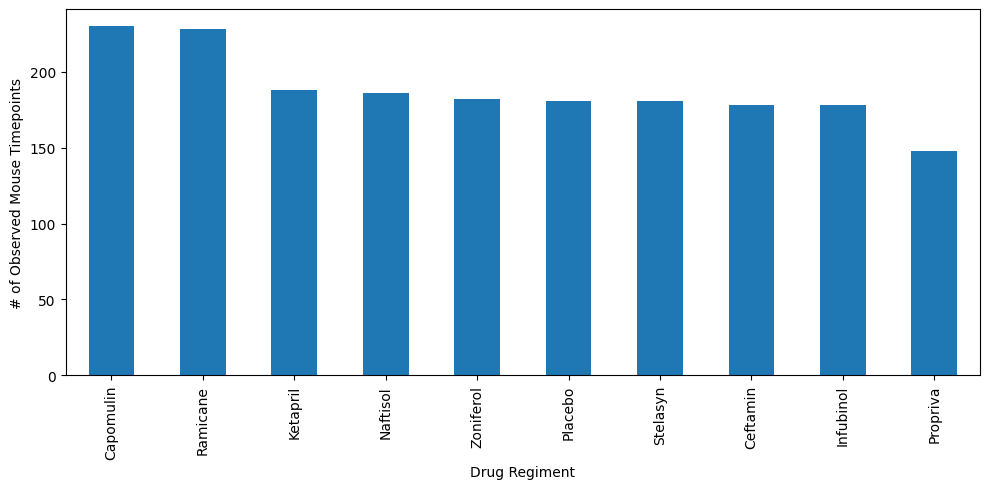

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen = pd.DataFrame({'Number of Rows': mouse_study_cleaned_df.groupby('Drug Regimen').count()['Mouse ID']}).sort_values(by='Number of Rows', ascending=False)

rows_per_regimen.plot(kind='bar', figsize=(10,5), xlabel="Drug Regiment",ylabel="# of Observed Mouse Timepoints", legend=False)

plt.tight_layout()
plt.show()

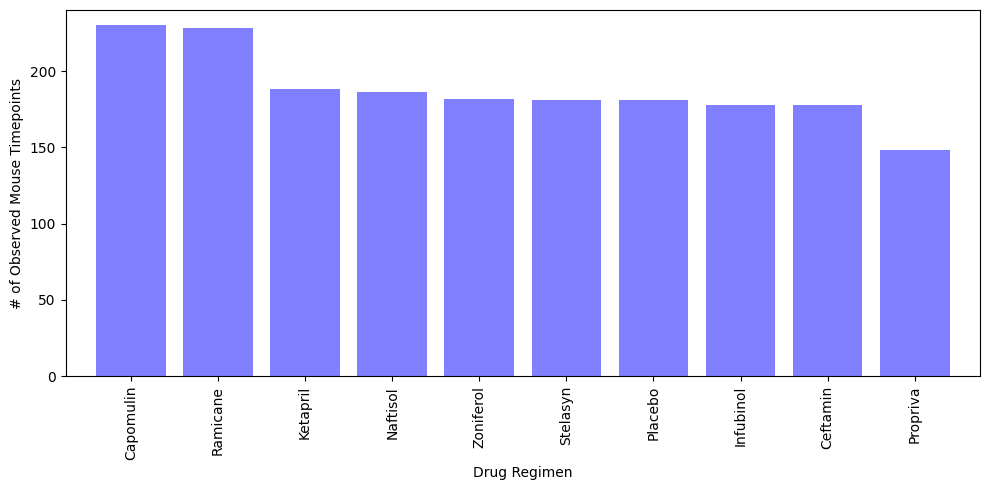

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_study_cleaned_df["Drug Regimen"].unique()))
x_ticks = [value for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(x_axis, mouse_study_cleaned_df["Drug Regimen"].value_counts(), color='b', alpha=0.5, align="center")
plt.xticks(x_ticks, mouse_study_cleaned_df["Drug Regimen"].value_counts().index, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_study_cleaned_df["Drug Regimen"].value_counts())+10)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.tight_layout()
plt.show()

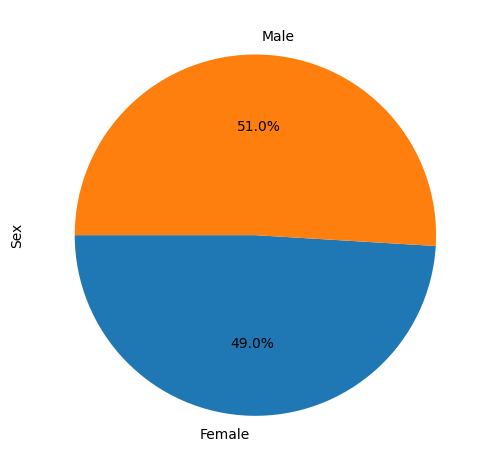

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_per_gender_df = pd.DataFrame({"mouse_per_gender": mouse_study_cleaned_df.groupby("Sex").count()["Mouse ID"]})

mouse_per_gender_df.plot(kind="pie", figsize=(5,5), autopct="%1.1f%%", startangle=180, subplots=True, legend=False, ylabel="Sex")

plt.tight_layout()
plt.show()

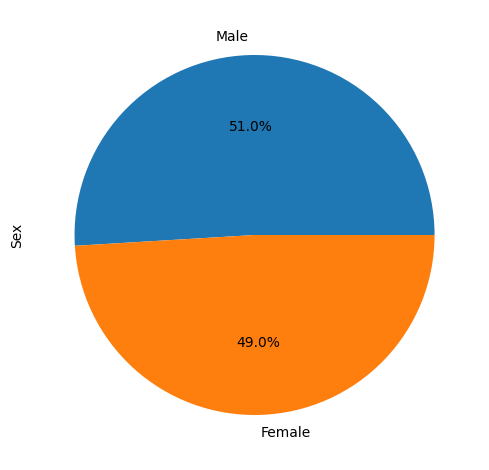

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_study_cleaned_df["Sex"].value_counts(), labels=mouse_study_cleaned_df["Sex"].value_counts().index, autopct="%1.1f%%")

plt.ylabel("Sex")
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# greatest_timepoint_df = pd.DataFrame({"Timepoint": mouse_study_cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()})
greatest_timepoint_df = mouse_study_cleaned_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tumor_df = greatest_timepoint_df.merge(mouse_study_cleaned_df,on=["Mouse ID", "Timepoint"], how="inner")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = greatest_tumor_df.loc[greatest_tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol.append(tumor_vol_data)
    
    # Calculate quantiles and IQR for each treatment
    quantiles = tumor_vol_data.quantile([.25,.5,.75])
    lower_quartile = quantiles[0.25]
    upper_quartile = quantiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]

    # Print results
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


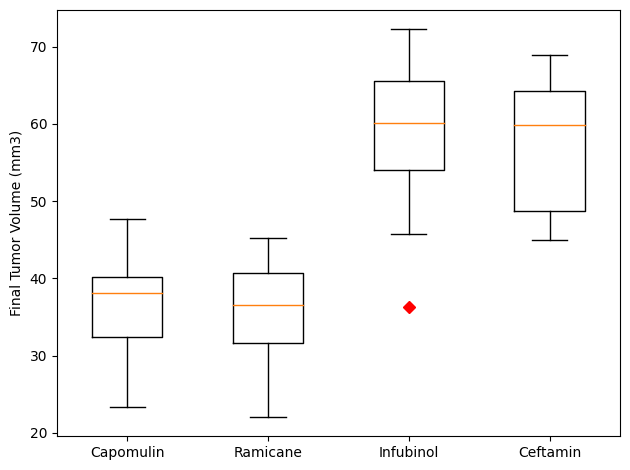

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

# Set title and labels
ax.set_ylabel('Final Tumor Volume (mm3)')


ax.boxplot(final_tumor_vol, 0, 'rD', labels=treatments, widths=0.5)

plt.tight_layout()

plt.show()

## Line and Scatter Plots

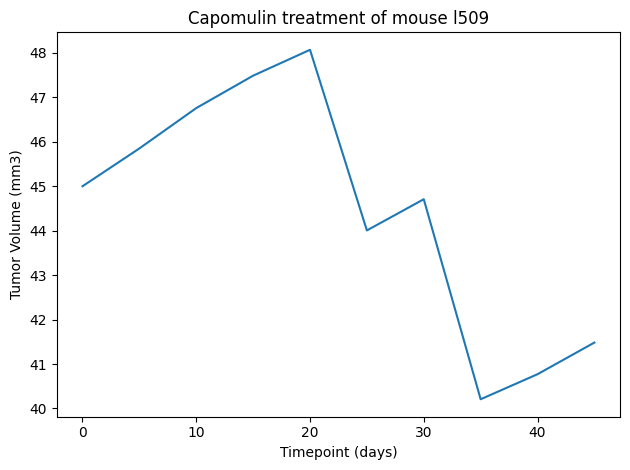

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_df = mouse_study_cleaned_df.loc[(mouse_study_cleaned_df["Mouse ID"] == "l509") & (mouse_study_cleaned_df["Drug Regimen"] == "Capomulin"), :]

single_mouse_df.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line", title="Capomulin treatment of mouse l509", legend=False)

plt.xlabel("Timepoint (days)")

plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

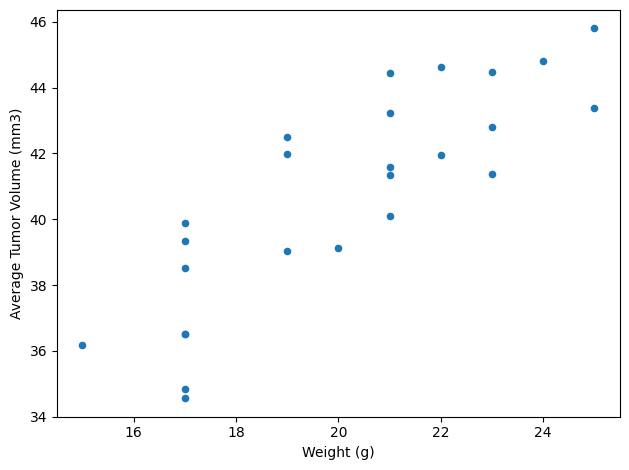

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = mouse_study_cleaned_df.loc[mouse_study_cleaned_df["Drug Regimen"] == "Capomulin"]

average_tumor_volume_df = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

wegith_average_tumor_volume_df = pd.DataFrame({"Average Tumor Volume (mm3)": average_tumor_volume_df,"Weight (g)": capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()})

wegith_average_tumor_volume_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


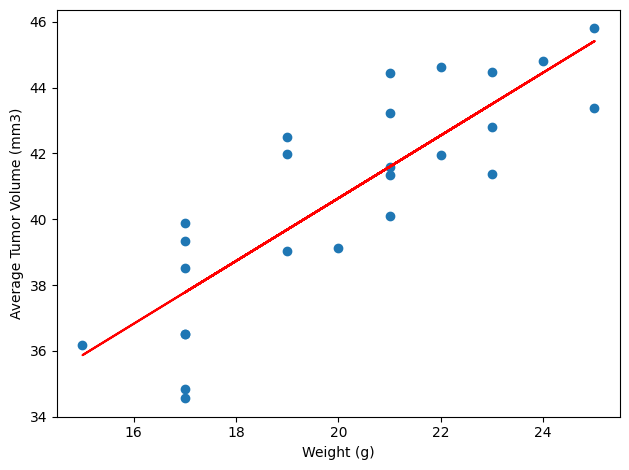

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(wegith_average_tumor_volume_df['Weight (g)'], wegith_average_tumor_volume_df['Average Tumor Volume (mm3)'])


print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")
regress_values = wegith_average_tumor_volume_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(wegith_average_tumor_volume_df['Weight (g)'], wegith_average_tumor_volume_df['Average Tumor Volume (mm3)'])
plt.plot(wegith_average_tumor_volume_df['Weight (g)'], regress_values, "r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()
